In [7]:
import numpy as np
import librosa
import librosa.display
import soundfile as sf
import matplotlib.pyplot as plt

In [3]:
y, sr = librosa.load('../data/fma_small/065/065488.mp3')

/home/icculus/anaconda3/envs/audio_processing/lib/python3.9/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Librosa has a default sampling rate of 22,050 hertz. Audio track is ~30s long.

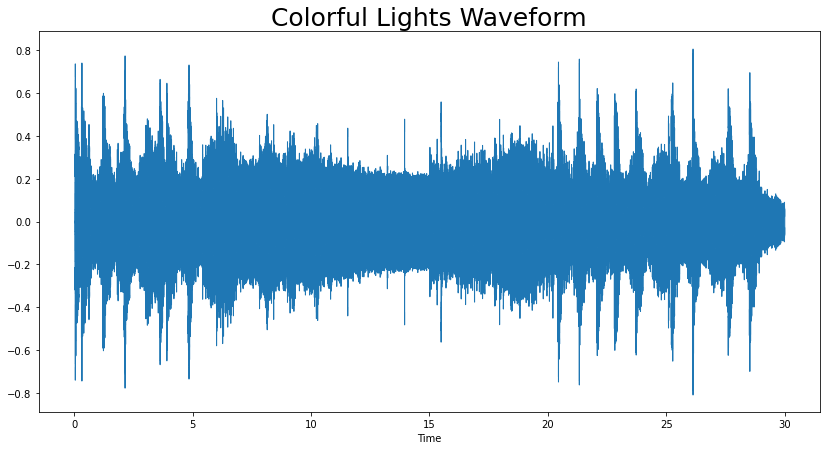

In [4]:
fig = plt.figure(figsize = (14, 7))
librosa.display.waveshow(y)
plt.title('Colorful Lights Waveform', size=25)
plt.savefig('../images/waveform.png');

In [5]:
stft = librosa.stft(y, sr)

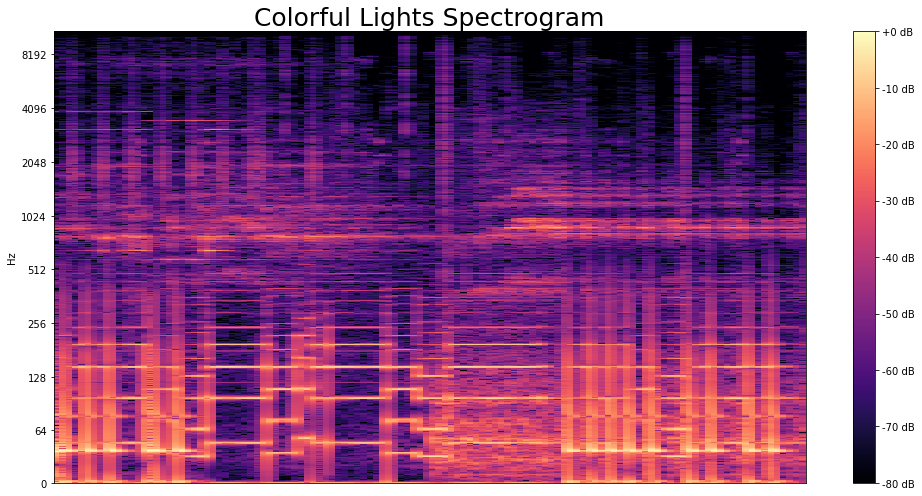

In [8]:
# http://man.hubwiz.com/docset/LibROSA.docset/Contents/Resources/Documents/generated/librosa.core.stft.html#librosa.core.stft

fig = plt.figure(figsize = (14, 7))
librosa.display.specshow(librosa.amplitude_to_db(np.abs(stft),
                                                 ref=np.max),
                        y_axis='log')
plt.title('Colorful Lights Spectrogram', size=25)
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.savefig('../images/stft.png');

In [9]:
mel_filters = librosa.filters.mel(sr, 2048)

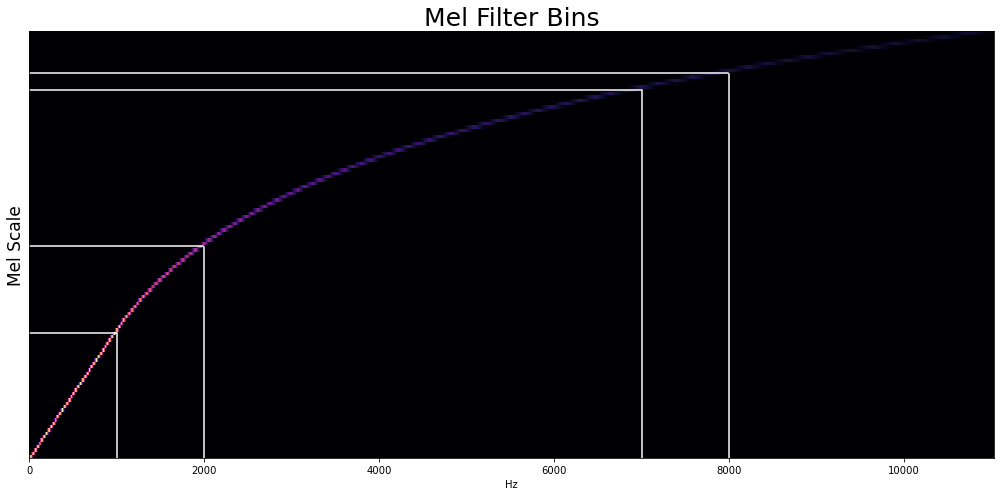

In [10]:
# http://man.hubwiz.com/docset/LibROSA.docset/Contents/Resources/Documents/generated/librosa.filters.mel.html#librosa.filters.mel

plt.figure(figsize=(14,7))
librosa.display.specshow(mel_filters, x_axis='linear')
plt.title('Mel Filter Bins', size = 25)
plt.ylabel('Mel Scale', size = 17)
plt.tight_layout()
plt.axvline(x=8000, ymax=.9, color='white')
plt.axvline(x=7000, ymax=.861, color='white')
plt.axvline(x=1000, ymax=.292, color='white')
plt.axvline(x=2000, ymax=.495, color='white')
plt.axhline(y=37.5, xmax=.09, color='white')
plt.axhline(y=63.5, xmax=.18, color='white')
plt.axhline(y=110.5, xmax=.635, color='white')
plt.axhline(y=115.5, xmax=.725, color='white')


plt.savefig('../images/mel_filter_bins.png');

In [11]:
mel_spec = librosa.feature.melspectrogram(y, sr)

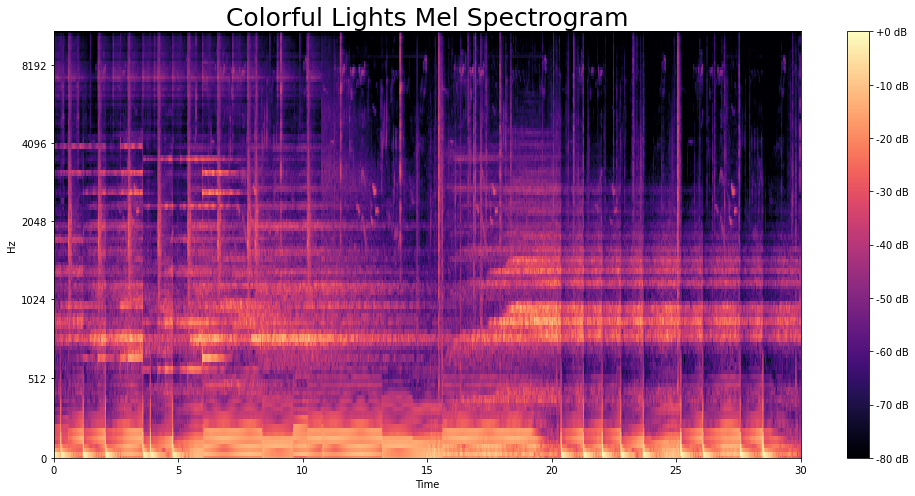

In [12]:
# http://man.hubwiz.com/docset/LibROSA.docset/Contents/Resources/Documents/generated/librosa.feature.melspectrogram.html#librosa.feature.melspectrogram

fig = plt.figure(figsize = (14, 7))

librosa.display.specshow(librosa.power_to_db(mel_spec,
                                             ref=np.max),
                        y_axis='mel', x_axis='time')
plt.title('Colorful Lights Mel Spectrogram', size=25)
plt.tight_layout()
plt.colorbar(format='%+2.0f dB')
plt.savefig('../images/mel_spec.png');

In [13]:
mfcc = librosa.feature.mfcc(y, hop_length=512)

In [14]:
mfcc.shape

(20, 1292)

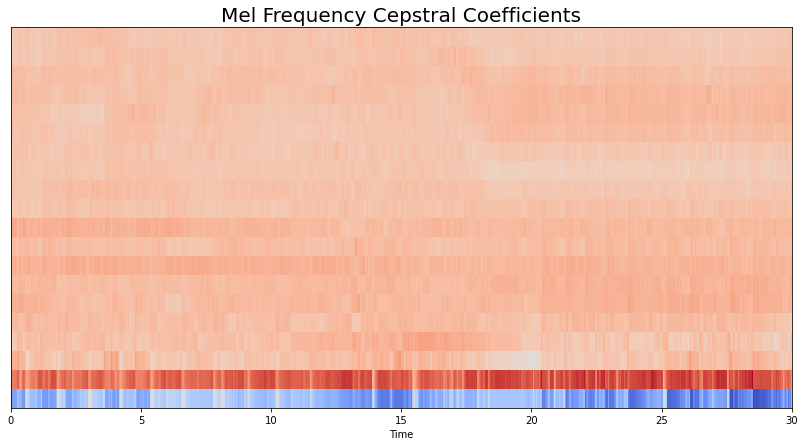

In [43]:
# http://man.hubwiz.com/docset/LibROSA.docset/Contents/Resources/Documents/generated/librosa.feature.mfcc.html#librosa.feature.mfcc

fig = plt.figure(figsize = (14, 7))
librosa.display.specshow(mfcc, x_axis='time')
plt.title('Mel Frequency Cepstral Coefficients', size=20)
plt.savefig('../images/mfccs.png')

In [16]:
mfcc_delta = librosa.feature.delta(mfcc)

In [17]:
mfcc_delta.shape

(20, 1292)

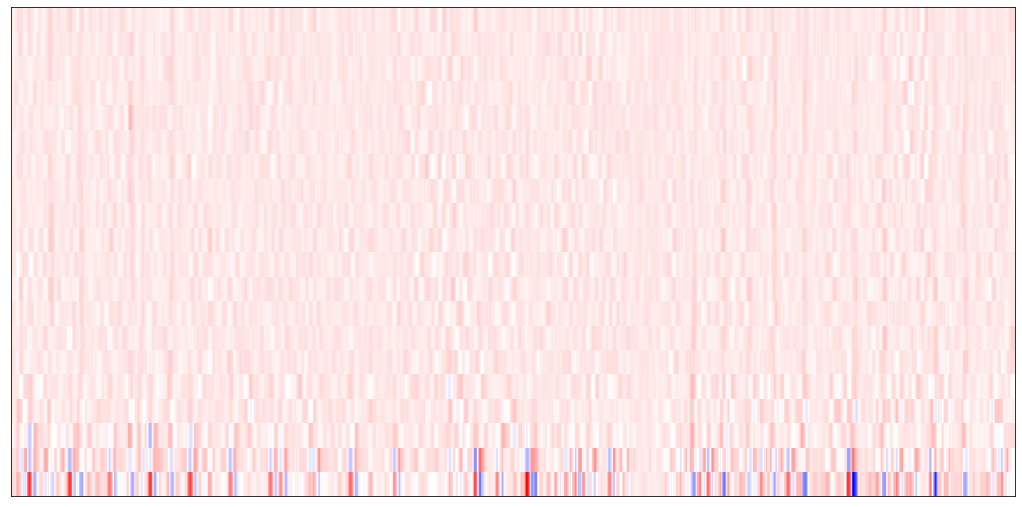

In [18]:
fig = plt.figure(figsize = (18, 9))
librosa.display.specshow(mfcc_delta, cmap='bwr')

**Interpretation:** This is looking at how much each mfcc has changed from frame to frame.

In [19]:
y_harmonic, y_percussive = librosa.effects.hpss(y)

In [20]:
y_harmonic.shape, y_percussive.shape

((661257,), (661257,))

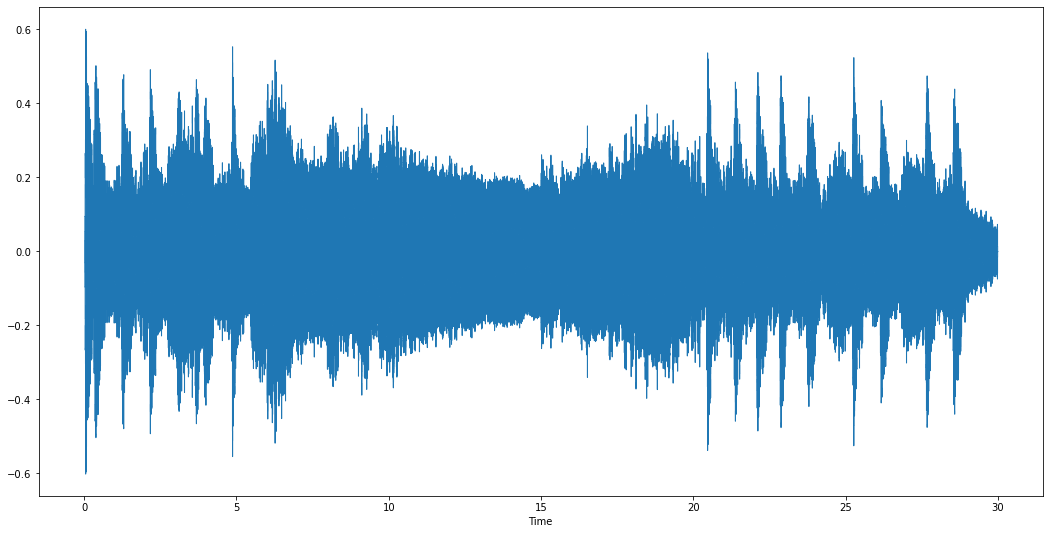

In [21]:
fig = plt.figure(figsize = (18, 9))
librosa.display.waveshow(y_harmonic)

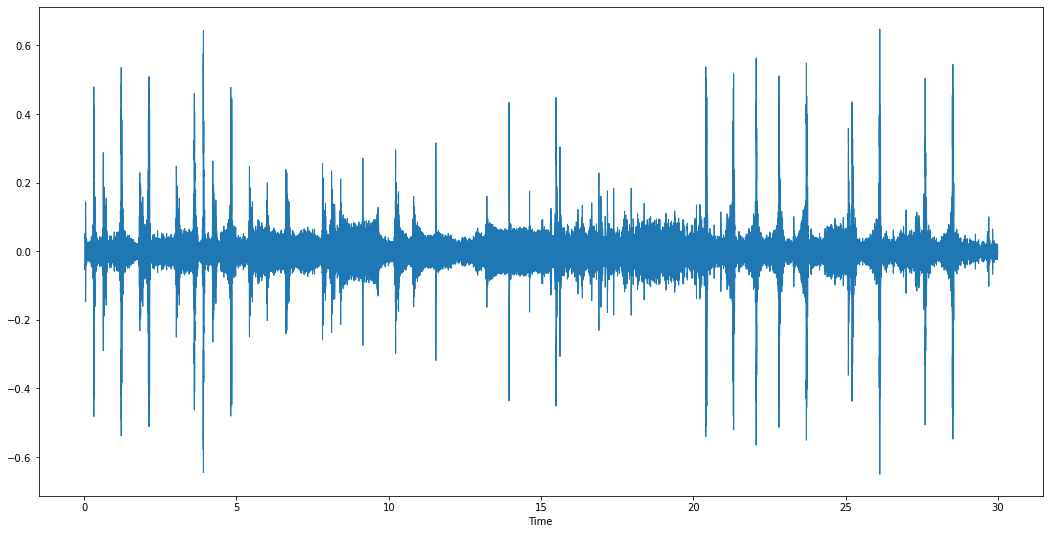

In [22]:
fig = plt.figure(figsize = (18, 9))
librosa.display.waveshow(y_percussive)

In [23]:
sf.write('percussive_test_file_48000.wav', y_percussive, sr)

In [24]:
sf.write('harmonic_test_file_48000.wav', y_harmonic, sr)

In [25]:
tempo, beat_frames = librosa.beat.beat_track(y=y_percussive, sr = sr)

In [26]:
tempo

99.38401442307692

In [27]:
print(beat_frames.shape)
beat_frames

(45,)


array([   3,   27,   53,   79,  105,  131,  156,  182,  208,  234,  259,
        285,  311,  337,  363,  389,  415,  441,  466,  498,  524,  550,
        575,  601,  630,  667,  693,  718,  741,  767,  793,  820,  847,
        873,  901,  926,  950,  976, 1004, 1029, 1054, 1081, 1109, 1136,
       1163])

In [28]:
beat_mfcc_delta = librosa.util.sync(np.vstack([mfcc, mfcc_delta]), beat_frames)

In [29]:
beat_mfcc_delta.shape

(40, 46)

more filters later

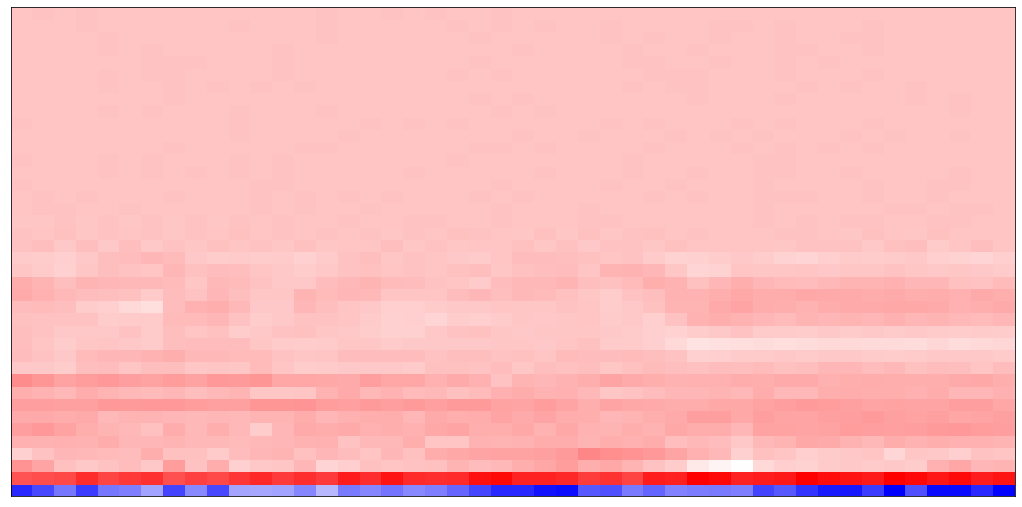

In [30]:
fig = plt.figure(figsize = (18, 9))
librosa.display.specshow(beat_mfcc_delta, cmap='bwr')

In [31]:
len(y_harmonic)

661257

In [32]:
1439471 / 512

2811.466796875

In [33]:
chromagram = librosa.feature.chroma_cqt(y=y_harmonic, sr= sr)

In [34]:
chromagram.shape

(12, 1292)

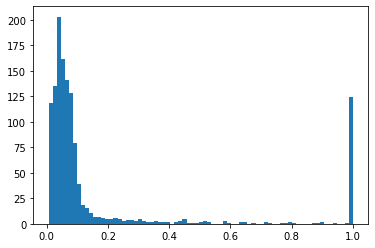

In [35]:
plt.hist(chromagram[0], bins = 75);

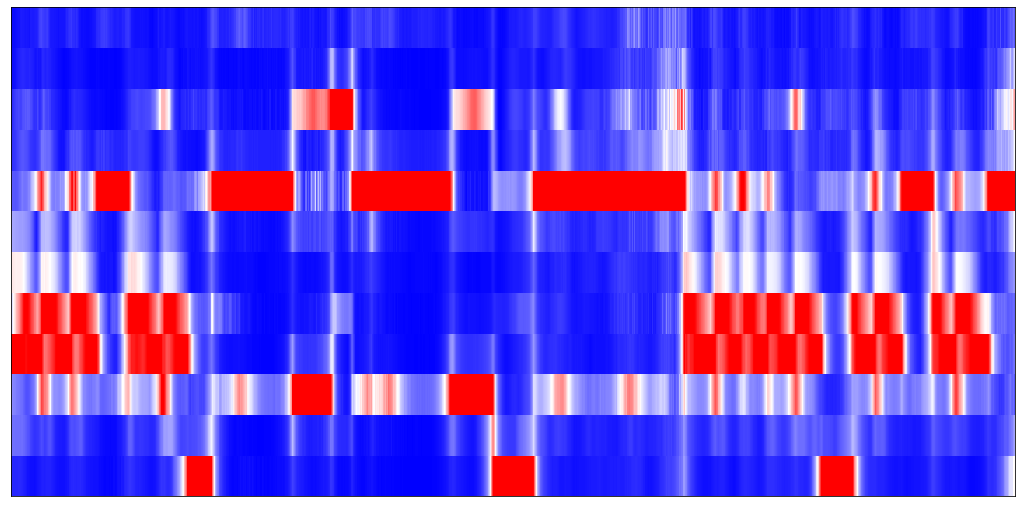

In [36]:
fig = plt.figure(figsize = (18, 9))
librosa.display.specshow(chromagram, cmap='bwr')

In [37]:
beat_chroma = librosa.util.sync(chromagram, beat_frames, aggregate=np.median)

In [38]:
beat_chroma.shape

(12, 46)

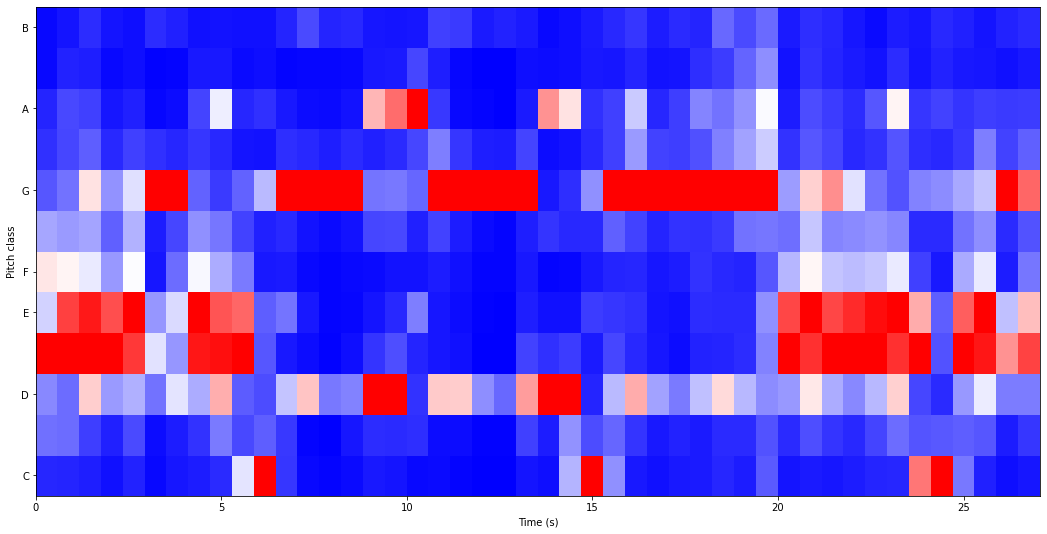

In [39]:
fig = plt.figure(figsize = (18, 9))
librosa.display.specshow(beat_chroma, cmap='bwr', sr = 870,
                         x_axis = 's', y_axis = 'chroma')

In [40]:
beat_features = np.vstack([beat_chroma, beat_mfcc_delta])

In [41]:
beat_features.shape

(52, 46)